
# Title:  "Cancer Drug Response Analyses"
## Author: "Dr. Alex Tzuu-Wang Chang"
### Date: "May/24/2019"

Given a set of "Mutation Annotation Format (MAF)" files of 50 cancer patients. 25 patients belong to drug RESPONDER group and the other 25 patients belong to drug NON-RESPONDER group. The mission is to discover the potential association between gene mutations and drug response. I will apply two types of statistical analyses to test the statistical association between mutated genes (from given patient MAF files) and cancer drug response outcome. The analyeses are dedicaterd to Precision Medicine (or called Personal Medicine) and Companion Diagnostics.  

First I will perform "Logistic Regression to test the significant association between gene mutation frequency and durg response outcome. Secondly I will perform "Pairwise Fisher Exact Test" to examine the same thing with Logistic Regression.

# Logistic Regression (Y~X1+X2+......X1166, Y:response, X:genes)
In order to apply the logistic regression under R environment I have to create two matrix stored in DataFrame format.
The first Matrix stored the information of frequence of each mutated gene across 50 tumorous patients.
The second Matrix stored the information of Sample information such as Drug Response and Mutation rate of each patient.

By the way, I will only test 1166 common shared mutated genes between responders and non-responders.
For those genes that only happened mutations on one side which means the gene mutations exist only in responders group or in non-responders group won't be enrolled into this analysis for their missing values property. 


In [28]:
# To set up the working path and directory and to check the current working directory content

require(reshape2)
set.seed(12345)
d <- Sys.Date()
base.dir <- "C:/Users/alextwc/Documents/JupyterNotebookFiles/R_Projects/VanallenAssessment/";
setwd(base.dir)
getwd()
dir()


[1] "C:/Users/alextwc/Documents/JupyterNotebookFiles/R_Projects/VanallenAssessment"

[1] "20161208.R.codes13.txt"                                  
 [2] "Coding assessment.docx"                                  
 [3] "CodingAssesment.txt"                                     
 [4] "CodingAssesment.txt.bak"                                 
 [5] "CommonMutatedGenes_2019-05-23.csv"                       
 [6] "FisherExactPairwise_2019-05-23.rda"                      
 [7] "FisherExactPairwiseInMutationsSignificant_2019-05-23.csv"
 [8] "FisherExactPairwiseInPatientsSignificant_2019-05-23.csv" 
 [9] "NonResponderGenesFreq.txt"                               
[10] "ProteinMutationFreq_2019-05-23.csv"                      
[11] "ProteinMutationFreq_2019-05-23.xlsx"                     
[12] "Q5.Answer.png.pdf"                                       
[13] "R-codes-1.txt"                                           
[14] "R-codes-2.txt"                                           
[15] "R-codes-3.txt"                                           
[16] "Report.txt"                                              
[17] "Report3.html"                                            
[18] "Report3.ipynb"                                           
[19] "Report3.pdf"                                             
[20] "ResponderGenesFreq.txt"                                  
[21] "SignificantGeneDistribution_2019-05-23.csv"              
[22] "SignificantGeneDistributionByPatients_2019-05-23.csv"    
[23] "SignificantGenesAcrossTotalPatients_2019-05-23.csv"      
[24] "TotalPatient1166MAF_2019-05-30.csv"                      
[25] "TotalPatientMAFwithoutSilentSpliceSite_2019-05-23.csv"   
[26] "TotalPatientMAFwithoutSilentSpliceSite_2019-05-23.xlsx"  
[27] "vanallen-assessment"

In [105]:
# The aobve codes running proved that we have set the correct working directory and path
# To read the input files

CommonMutated1166genes <- read.csv("./CommonMutatedGenes_2019-05-23.csv", stringsAsFactors = FALSE, header = TRUE,  check.names = FALSE)
TotalPatientMAFwithoutSilentSpliceSite <- read.csv("./TotalPatientMAFwithoutSilentSpliceSite_2019-05-23.csv", stringsAsFactors = FALSE, header = TRUE,  check.names = FALSE)
TotalPatient1166MAF <- subset(TotalPatientMAFwithoutSilentSpliceSite, (TotalPatientMAFwithoutSilentSpliceSite$Hugo_Symbol %in% CommonMutated1166genes$Hugo_Symbol))
levels(factor(TotalPatient1166MAF$Patient_ID))
dim(TotalPatient1166MAF)
head(TotalPatient1166MAF)

# The following running result indicated the 1166 common shared genes with 3756 mutation records 

[1] "Patient-0"  "Patient-1"  "Patient-10" "Patient-11" "Patient-12"
 [6] "Patient-13" "Patient-14" "Patient-15" "Patient-16" "Patient-17"
[11] "Patient-18" "Patient-19" "Patient-2"  "Patient-20" "Patient-21"
[16] "Patient-22" "Patient-23" "Patient-24" "Patient-25" "Patient-26"
[21] "Patient-27" "Patient-28" "Patient-29" "Patient-3"  "Patient-30"
[26] "Patient-31" "Patient-32" "Patient-33" "Patient-34" "Patient-35"
[31] "Patient-36" "Patient-37" "Patient-38" "Patient-39" "Patient-4" 
[36] "Patient-40" "Patient-41" "Patient-42" "Patient-43" "Patient-44"
[41] "Patient-45" "Patient-46" "Patient-47" "Patient-48" "Patient-49"
[46] "Patient-5"  "Patient-6"  "Patient-7"  "Patient-8"  "Patient-9"

[1] 3756   21

,Protein_Change,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,Matched_Norm_Sample_Barcode.x,t_alt_count,t_ref_count,Patient_ID,Matched_Norm_Sample_Barcode.y,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb,ProteinMutationFreq
5,AA,Patient-37-Tumor,CUBN,10,17087006,17087006,Splice_Site,SNP,A,A,...,Patient-37-Normal,8,90,Patient-37,Patient-37-Normal,Responder,9.10,19.60,28.700,5
9,AD,Patient-20-Tumor,LAMA1,18,7002287,7002287,Missense_Mutation,SNP,G,G,...,Patient-20-Normal,9,142,Patient-20,Patient-20-Normal,Non-Responder,0.64,1.83,2.471,14
10,AD,Patient-45-Tumor,TP53,17,7578448,7578448,Missense_Mutation,SNP,G,G,...,Patient-45-Normal,56,48,Patient-45,Patient-45-Normal,Non-Responder,1.61,4.19,5.800,14
12,AD,Patient-22-Tumor,FLNA,X,153581783,153581783,Missense_Mutation,SNP,G,G,...,Patient-22-Normal,5,101,Patient-22,Patient-22-Normal,Non-Responder,2.99,7.44,10.430,14
13,AD,Patient-37-Tumor,MYCBP2,13,77671756,77671756,Missense_Mutation,SNP,G,G,...,Patient-37-Normal,8,20,Patient-37,Patient-37-Normal,Responder,9.10,19.60,28.700,14
22,AE,Patient-27-Tumor,NKTR,3,42678809,42678809,Missense_Mutation,SNP,C,C,...,Patient-27-Normal,77,140,Patient-27,Patient-27-Normal,Responder,3.73,9.39,13.120,12


In [106]:
# To delete those unwanted columns and prepare the data transformation
# write.csv(TotalPatient1166MAF, file=paste("./TotalPatient1166MAF_", d, ".csv", sep=""), row.names=FALSE)
# TotalPatient1166MAF$Tumor_Sample_Barcode <- NULL
# TotalPatient1166MAF$Variant_Type <- NULL
# TotalPatient1166MAF$Matched_Norm_Sample_Barcode.x <- NULL
# TotalPatient1166MAF$Matched_Norm_Sample_Barcode.y <- NULL

TotalPatient1166MAF <- TotalPatient1166MAF[order(TotalPatient1166MAF$Hugo_Symbol), ]
TotalPatient1166MAF <- TotalPatient1166MAF[, -c(1,2,4:14,16,17,18:21)]
dim(TotalPatient1166MAF)
head(TotalPatient1166MAF)

# The folloiwng running result indicated that we only preserved 2 columns at this moment

[1] 3756    2

,Hugo_Symbol,Patient_ID
9082,ABCA13,Patient-9
9621,ABCA13,Patient-30
10805,ABCA13,Patient-11
10882,ABCA13,Patient-37
2831,ABCA7,Patient-17
3492,ABCA7,Patient-26


In [107]:
# Prepare for the data transformation

categorical_varaibles = c("Patient_ID")
for(x in categorical_varaibles) {
    TotalPatient1166MAF  = cbind(TotalPatient1166MAF,  value=1);  
    TotalPatient1166MAF[,x]=TotalPatient1166MAF[,x]; 
    TotalPatient1166MAF  = dcast(TotalPatient1166MAF,  as.formula(paste0("... ~ ", x)), fill=0, fun.aggregate = sum);
}

dim(TotalPatient1166MAF)
head(TotalPatient1166MAF)
names(TotalPatient1166MAF)
print(TotalPatient1166MAF[which(TotalPatient1166MAF$Hugo_Symbol=="ABCA13"), ]) # total 4 mutations
ABCA13 <- rowSums(TotalPatient1166MAF[1,2:51])
message("# The quantity of ABCA13 mutations across 50 patients is ", ABCA13)

# The following running result proved that we have successfully converted the data format from long to wide
# There is no error messsage "aggregation function missing defaulting to length" now
# By checking the mutation amount of ABCA13 gene we once again confirmed that the data conversion is correct

[1] 1166   51

Hugo_Symbol,Patient-0,Patient-1,Patient-10,Patient-11,Patient-12,Patient-13,Patient-14,Patient-15,Patient-16,...,Patient-45,Patient-46,Patient-47,Patient-48,Patient-49,Patient-5,Patient-6,Patient-7,Patient-8,Patient-9
ABCA13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABCA7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCA9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCC12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ABCC5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ABCC8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


[1] "Hugo_Symbol" "Patient-0"   "Patient-1"   "Patient-10"  "Patient-11" 
 [6] "Patient-12"  "Patient-13"  "Patient-14"  "Patient-15"  "Patient-16" 
[11] "Patient-17"  "Patient-18"  "Patient-19"  "Patient-2"   "Patient-20" 
[16] "Patient-21"  "Patient-22"  "Patient-23"  "Patient-24"  "Patient-25" 
[21] "Patient-26"  "Patient-27"  "Patient-28"  "Patient-29"  "Patient-3"  
[26] "Patient-30"  "Patient-31"  "Patient-32"  "Patient-33"  "Patient-34" 
[31] "Patient-35"  "Patient-36"  "Patient-37"  "Patient-38"  "Patient-39" 
[36] "Patient-4"   "Patient-40"  "Patient-41"  "Patient-42"  "Patient-43" 
[41] "Patient-44"  "Patient-45"  "Patient-46"  "Patient-47"  "Patient-48" 
[46] "Patient-49"  "Patient-5"   "Patient-6"   "Patient-7"   "Patient-8"  
[51] "Patient-9"

  Hugo_Symbol Patient-0 Patient-1 Patient-10 Patient-11 Patient-12 Patient-13
1      ABCA13         0         0          0          1          0          0
  Patient-14 Patient-15 Patient-16 Patient-17 Patient-18 Patient-19 Patient-2
1          0          0          0          0          0          0         0
  Patient-20 Patient-21 Patient-22 Patient-23 Patient-24 Patient-25 Patient-26
1          0          0          0          0          0          0          0
  Patient-27 Patient-28 Patient-29 Patient-3 Patient-30 Patient-31 Patient-32
1          0          0          0         0          1          0          0
  Patient-33 Patient-34 Patient-35 Patient-36 Patient-37 Patient-38 Patient-39
1          0          0          0          0          1          0          0
  Patient-4 Patient-40 Patient-41 Patient-42 Patient-43 Patient-44 Patient-45
1         0          0          0          0          0          0          0
  Patient-46 Patient-47 Patient-48 Patient-49 Patient-5 Pati

# The quantity of ABCA13 mutations across 50 patients is 4


In [108]:
# print(TotalPatient1166MAF[which(TotalPatient1166MAF$Hugo_Symbol=="KMT2C"), ]) # total 20 mutations
# print(TotalPatient1166MAF[which(TotalPatient1166MAF$Hugo_Symbol=="TYRO3"), ]) # total 11 mutations
# print(TotalPatient1166MAF[which(TotalPatient1166MAF$Hugo_Symbol=="TTN"), ])   # total 41 mutations
# print(TotalPatient1166MAF[which(TotalPatient1166MAF$Hugo_Symbol=="UBR5"), ])  # total 07 mutations
# I further trimmed out those columns that I won't need
# TotalPatient1166MAF <- TotalPatient1166MAF[, -c(1,3,4)]
# dim(TotalPatient1166MAF)
# head(TotalPatient1166MAF)

In [109]:
# The common shared genes are only 1166 but the above table contains 3582 records
# so this step will count the same gene frequence to create the final gene frequence matrix used for logistic regression
# Hugo_SymbolCount <- 0
# for(i in CommonMutated1166genes$Hugo_Symbol) {
#   tmp1 <- subset(TotalPatient1166MAF, (TotalPatient1166MAF$Hugo_Symbol %in% i))
#   tmp2 <- tmp1[, -1]
#   tmp1 <- rbind(tmp2,colSums(tmp2))
#   tmp2 <- data.frame("Hugo_Symbol"=i,tail(tmp1,1),stringsAsFactors=FALSE)
#   Hugo_SymbolCount <- rbind(Hugo_SymbolCount, tmp2)
# }
# Hugo_SymbolCount <- Hugo_SymbolCount[-1,]
# Adding rownames to each matrix as index vector

Hugo_SymbolCount <- TotalPatient1166MAF
rownames(Hugo_SymbolCount) = Hugo_SymbolCount[, 1]
dim(Hugo_SymbolCount)
head(Hugo_SymbolCount)

# names(Hugo_SymbolCount)[2:51] <- gsub('[.]', '-', names(Hugo_SymbolCount)[2:51])
# As you can see the output table contains only 1166 genes so I finished creating the GeneMutationFrequency matrix 
# which is named as "Hugo_SymbolCount" here.

[1] 1166   51

,Hugo_Symbol,Patient-0,Patient-1,Patient-10,Patient-11,Patient-12,Patient-13,Patient-14,Patient-15,Patient-16,...,Patient-45,Patient-46,Patient-47,Patient-48,Patient-49,Patient-5,Patient-6,Patient-7,Patient-8,Patient-9
ABCA13,ABCA13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABCA7,ABCA7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCA9,ABCA9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCC12,ABCC12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ABCC5,ABCC5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ABCC8,ABCC8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
# Now I want to create the drug response matrix named ResponseOutcome (50x2)
# outcome=1 means responder; outcome=0 means non-responder

SampleInformation <- read.table("./vanallen-assessment/sample-information.tsv", sep="\t", header = TRUE, stringsAsFactors = FALSE)
head(SampleInformation)
dim(SampleInformation)


Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb
Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64
Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06
Patient-2,Patient-2-Tumor,Patient-2-Normal,Responder,1.32,2.84,4.16
Patient-3,Patient-3-Tumor,Patient-3-Normal,Non-Responder,1.78,5.00,6.78
Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43
Patient-5,Patient-5-Tumor,Patient-5-Normal,Non-Responder,3.01,8.15,11.16


[1] 50  7

In [111]:
# The following steps will create the second matrix stored the drug response information as the binary outcome
# which Response=1 means responder; Response=0 means non-responder

ResponseOutcome <- SampleInformation[, c(1,4)]
ResponseOutcome$Response[which(ResponseOutcome$Response=="Non-Responder")] <- 0
ResponseOutcome$Response[which(ResponseOutcome$Response=="Responder")] <- 1
ResponseOutcome <- ResponseOutcome[order(ResponseOutcome$Patient_ID),]
dim(ResponseOutcome)
head(ResponseOutcome)
rownames(ResponseOutcome) = ResponseOutcome[, 1]
head(ResponseOutcome)
print(names(Hugo_SymbolCount)[2:51])
print(ResponseOutcome$Patient_ID)
print(identical(colnames(Hugo_SymbolCount)[2:51], as.character(ResponseOutcome$Patient_ID)))
head(Hugo_SymbolCount)

# I carefully checked the Patient_ID to make sure the Patient_ID information is identical between 2 matrix 
# I finished the DrugResonseOutcome matrix

[1] 50  2

,Patient_ID,Response
1,Patient-0,0
2,Patient-1,1
11,Patient-10,0
12,Patient-11,1
13,Patient-12,1
14,Patient-13,1


,Patient_ID,Response
Patient-0,Patient-0,0
Patient-1,Patient-1,1
Patient-10,Patient-10,0
Patient-11,Patient-11,1
Patient-12,Patient-12,1
Patient-13,Patient-13,1


 [1] "Patient-0"  "Patient-1"  "Patient-10" "Patient-11" "Patient-12"
 [6] "Patient-13" "Patient-14" "Patient-15" "Patient-16" "Patient-17"
[11] "Patient-18" "Patient-19" "Patient-2"  "Patient-20" "Patient-21"
[16] "Patient-22" "Patient-23" "Patient-24" "Patient-25" "Patient-26"
[21] "Patient-27" "Patient-28" "Patient-29" "Patient-3"  "Patient-30"
[26] "Patient-31" "Patient-32" "Patient-33" "Patient-34" "Patient-35"
[31] "Patient-36" "Patient-37" "Patient-38" "Patient-39" "Patient-4" 
[36] "Patient-40" "Patient-41" "Patient-42" "Patient-43" "Patient-44"
[41] "Patient-45" "Patient-46" "Patient-47" "Patient-48" "Patient-49"
[46] "Patient-5"  "Patient-6"  "Patient-7"  "Patient-8"  "Patient-9" 
 [1] "Patient-0"  "Patient-1"  "Patient-10" "Patient-11" "Patient-12"
 [6] "Patient-13" "Patient-14" "Patient-15" "Patient-16" "Patient-17"
[11] "Patient-18" "Patient-19" "Patient-2"  "Patient-20" "Patient-21"
[16] "Patient-22" "Patient-23" "Patient-24" "Patient-25" "Patient-26"
[21] "Patient-27" "P

,Hugo_Symbol,Patient-0,Patient-1,Patient-10,Patient-11,Patient-12,Patient-13,Patient-14,Patient-15,Patient-16,...,Patient-45,Patient-46,Patient-47,Patient-48,Patient-49,Patient-5,Patient-6,Patient-7,Patient-8,Patient-9
ABCA13,ABCA13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABCA7,ABCA7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCA9,ABCA9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCC12,ABCC12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ABCC5,ABCC5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ABCC8,ABCC8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
# I deleted the Hugo_Symbol column from Hugo_SymbolCount matrix 

Hugo_SymbolCount  <-  Hugo_SymbolCount[,-1]
head(Hugo_SymbolCount)
dim(Hugo_SymbolCount)


,Patient-0,Patient-1,Patient-10,Patient-11,Patient-12,Patient-13,Patient-14,Patient-15,Patient-16,Patient-17,...,Patient-45,Patient-46,Patient-47,Patient-48,Patient-49,Patient-5,Patient-6,Patient-7,Patient-8,Patient-9
ABCA13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABCA7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ABCA9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCC12,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
ABCC5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ABCC8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


[1] 1166   50

In [113]:
# The following codes are for Logitic regression to test the drug response association 
# with 1166 mutated genes (categorical variables). 

dat <- data.matrix(Hugo_SymbolCount)
pDat <- ResponseOutcome
pDat$Response <- as.numeric(pDat$Response)
zVec <- 0
pVec <- 0
nGene=nrow(Hugo_SymbolCount)
for(i in 1:nGene)
{
  pDat$x=dat[i,]
  resi=summary(glm(Response~x, data=pDat))
  # resi=summary(glm(Response~x, data=pDat, family = "binomial"))
  zVec=c(zVec, resi$coefficients[2,3]) # z value 
  pVec=c(pVec, resi$coefficients[2,4]) # p value
}
zVec <- zVec[-1]
pVec <- pVec[-1]
print(resi)


Call:
glm(formula = Response ~ x, data = pDat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8000  -0.4667  -0.1333   0.5333   0.5333  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46667    0.07454   6.261    1e-07 ***
x            0.33333    0.23570   1.414    0.164    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.25)

    Null deviance: 12.5  on 49  degrees of freedom
Residual deviance: 12.0  on 48  degrees of freedom
AIC: 76.538

Number of Fisher Scoring iterations: 2



In [114]:
# The following codes are for multitesting FDR calculations to get adjusted p-value for beta coefficient (Odds Ratio)

resFrame=data.frame(stat=zVec, pval=pVec)
resFrame$p.adj=p.adjust(resFrame$pval, method="fdr")
rownames(resFrame) = rownames(Hugo_SymbolCount)
resFrame.s=resFrame[order(resFrame$pval),]
head(resFrame)
head(resFrame.s)

print(resFrame.s[1:5,])
print(sum(resFrame$p.adj<0.05))


,stat,pval,p.adj
ABCA13,1.032796e+00,0.3068754,1
ABCA7,-2.175584e-16,1.0000000,1
ABCA9,0.000000e+00,1.0000000,1
ABCC12,5.855400e-01,0.5609277,1
ABCC5,5.855400e-01,0.5609277,1
ABCC8,0.000000e+00,1.0000000,1


,stat,pval,p.adj
LAMA3,2.085144,0.04239818,1
TG,2.085144,0.04239818,1
MYCBP2,2.078461,0.04303628,1
TYRO3,-2.025158,0.04843186,1
PRG4,1.759765,0.08481953,1
RNF213,1.759765,0.08481953,1


            stat       pval p.adj
LAMA3   2.085144 0.04239818     1
TG      2.085144 0.04239818     1
MYCBP2  2.078461 0.04303628     1
TYRO3  -2.025158 0.04843186     1
PRG4    1.759765 0.08481953     1
[1] 0


### Conlusion: 

(1). Only 4 genes (LAMA3, TG, MYCBP2 and TYRO3) are statistical significant with drug response association if using the nominal 
     p-value before multi-testing FDR based adjustment. None of genes are statistical significant associated with drug response
     if using the adjusted p-value.
     
(2). TYRO3 is the only gene (negative beta) which could be used to explain the cancer drug resistence and this result is
     compatible with my pairwise Fisher Exact Test. The cancer drug resistence increases about 2.02 folds when TYRO3 gene 
     mutation increased one unit after controlled/fixed all other 1165 gene mutations.
     
(3). To look for the association between gene mutation and drug response should explore the mutation frequnce per gene rather
     than per patient in my point. Each mis-sense mutation does contribute to the pathogenicity of mutant protein therefore I
     decided to count the mutated gene frequence not on per patient base but on each gene base. Patient-38 contributed 12 
     counts of KMT2C mutation events hence I did not see these 12 counts as one count but still see them as 12 counts.
     
(4). On page-54 and its following pages of my PhD dissertation I mentioned about the calculation of omega ratio to estimate
     mutation rate (2.2.7 Determination of omega (ω) value, also known as dN/dS ratio or Ka/Ks ratio) and the evolutionary
     direction (neutral or selective or positive). This might be an useful idea to be used as an index to estimate the rate of
     tumorgenesis process. (Here is the link: https://drive.google.com/file/d/1x2Lkni3IWKUq4TBjvMX49P63P_O-8aZ4/view )
     
(5). I found I can estimate the experimental Minor Allele Frequency through "t_alt_count/(t_alt_count+t_ref_count)".

Hugo_Symbol	Protein_Change	t_alt_count	t_ref_count	MAF	Reference_Allele	Tumor_Seq_Allele1	Tumor_Seq_Allele2
ANKRD30A	AP	6	111	0.051282051	G	G	C
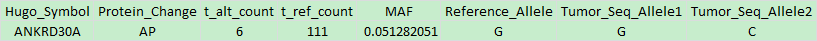

     Using the above ANKRD30A as an example. The experimental MAF is equal to 0.05 which is not a common variant but a rare
     variant (MAF<15%). We should be able to find 5 persons who bear this variant every 100 persons, but we only found 2
     persons (both belong to non-responder group) bear this variant (position 37431050, SNP). From 1000 genome dataset this 
     SNP is a common variant therefore it seems this SNP appeared less in cancer patient because the MAF I got from this
     dataset has smaller value.

(6). There is an R package called "glmnet" which claimed that it could get more significant hits than R build-in GLM library.


# Pairwise Fisher Exact Test (2x2 contingency table)
(01). I first created a global dataset which merged 50 patientMAF files with SampleInformation(.tsv) file.
(02). I trimmed the global dataset according to the instruction to remove those "silent" mutation type.
(03). I sorted and counted the dataset according to "Protein_Change" (has converted the pattern of "p.E234K" to "EK" 
      as an example)
      
      Here are the top 15 results:
          Mutatioan_Type			Total_Occurance_Among_All_patients_All_Genes 
                EK                      	       1104
                EQ						            610
                SL						            490
                DN						            471
                Q*						            359
                SF						            332
                RQ						            282
                DH	                      			262
                SC	                      			256
                LV	                      			224
                LF	                      			202
                S*	                      			199
      For example, mutation type "Glutamic Acid replaced by Lysine (E->K)" were discovered totally 1104 counts in 
      global dataset.
      These 1104 times including both responders group and non-responders group.
(04). I split the global dataset into two subsets which are 
      "Responders Group (7571 records / 5301 genes)" and "Non-Responders Group (3467 records / 2699 genes)".
      I took the intersection between these two groups to get a common shared gene list (1166 genes) between Responders 
      and Non-Responders.
   

In [178]:
# To set up the working directory and path

library(plyr)
set.seed(12345)
d <- Sys.Date()
base.dir <- "C:/Users/alextwc/Documents/JupyterNotebookFiles/R_Projects/VanallenAssessment/";
setwd(base.dir)
getwd()
dir()
SampleInformation <- read.table("./vanallen-assessment/sample-information.tsv", sep="\t", header = TRUE, stringsAsFactors = FALSE)
setwd("./vanallen-assessment/mafs")              
List_TotalPatientSomaticMAF <- dir()
setwd(base.dir)

# To create a global dataset which merged 50 patient MAF files

TotalPatientMAF <- 0 
for(i in List_TotalPatientSomaticMAF){
  filepath=paste("./vanallen-assessment/mafs/", i, sep="")
  TempFile <- read.table(filepath, sep="\t", header = TRUE, stringsAsFactors = FALSE)
  TotalPatientMAF <- rbind(TotalPatientMAF,TempFile)
}
# head(TotalPatientMAF)
# dim(TotalPatientMAF)
TotalPatientMAF <- TotalPatientMAF[-c(1),]
#/* AllColumnZero <- TotalPatientMAF[(rowSums(TotalPatientMAF==0.0) == ncol(TotalPatientMAF)),] */
#/* which(TotalPatientMAF$Hugo_Symbol==0, arr.ind=TRUE)                                         */

head(TotalPatientMAF)
dim(TotalPatientMAF)

# Finished the construction of global dataset which contains 15673 gene mutation records across 50 cancer patients

[1] "C:/Users/alextwc/Documents/JupyterNotebookFiles/R_Projects/VanallenAssessment"

[1] "20161208.R.codes13.txt"                                  
 [2] "Coding assessment.docx"                                  
 [3] "CodingAssesment.txt"                                     
 [4] "CodingAssesment.txt.bak"                                 
 [5] "CommonMutatedGenes_2019-05-23.csv"                       
 [6] "FisherExactPairwise_2019-05-23.rda"                      
 [7] "FisherExactPairwiseInMutationsSignificant_2019-05-23.csv"
 [8] "FisherExactPairwiseInPatientsSignificant_2019-05-23.csv" 
 [9] "NonResponderGenesFreq.txt"                               
[10] "ProteinMutationFreq_2019-05-23.csv"                      
[11] "ProteinMutationFreq_2019-05-23.xlsx"                     
[12] "Q5.Answer.png.pdf"                                       
[13] "R-codes-1.txt"                                           
[14] "R-codes-2.txt"                                           
[15] "R-codes-3.txt"                                           
[16] "Report.txt"                                              
[17] "Report3.html"                                            
[18] "Report3.ipynb"                                           
[19] "Report3.pdf"                                             
[20] "ResponderGenesFreq.txt"                                  
[21] "SignificantGeneDistribution_2019-05-23.csv"              
[22] "SignificantGeneDistributionByPatients_2019-05-23.csv"    
[23] "SignificantGenesAcrossTotalPatients_2019-05-23.csv"      
[24] "TotalPatient1166MAF_2019-05-30.csv"                      
[25] "TotalPatientMAFwithoutSilentSpliceSite_2019-05-23.csv"   
[26] "TotalPatientMAFwithoutSilentSpliceSite_2019-05-23.xlsx"  
[27] "vanallen-assessment"

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
2,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
3,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
4,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
5,TNR,1,175372529,175372529,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S241S,30,155
6,CPA4,7,129944344,129944344,Silent,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.A137A,12,100
7,SLC35E2B,1,1607589,1607589,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.L124L,5,29


[1] 15673    14

In [179]:
# To remove the silent mutations
# To merge with "SampleInformation" file
# To remove the "Splice_Site_Mutation"

TotalSilent <- subset(TotalPatientMAF, Variant_Classification=="Silent")
TotalPatientMAFwithoutSilent <- TotalPatientMAF[setdiff(rownames(TotalPatientMAF), rownames(TotalSilent)),]
TotalPatientMAFwithoutSilent <- merge(TotalPatientMAFwithoutSilent, SampleInformation, by="Tumor_Sample_Barcode")
dim(TotalPatientMAF)
dim(TotalSilent)
dim(TotalPatientMAFwithoutSilent)
#/* levels(factor(TotalPatientMAFwithoutSilent$Protein_Change)) */
#library(plyr)

TotalPatientMAFwithoutSilent <- TotalPatientMAF[setdiff(rownames(TotalPatientMAF), rownames(TotalSilent)),]
TotalPatientMAFwithoutSilent$Protein_Change[which(TotalPatientMAFwithoutSilent$Protein_Change=="")] <- "Splice_Site_Mutation"
SpliceSiteMutation <- subset(TotalPatientMAFwithoutSilent, Protein_Change=="Splice_Site_Mutation")
TotalPatientMAFwithoutSilentSpliceSite <- TotalPatientMAFwithoutSilent[setdiff(rownames(TotalPatientMAFwithoutSilent), rownames(SpliceSiteMutation)), ]
TotalPatientMAFwithoutSilentSpliceSite <- merge(TotalPatientMAFwithoutSilentSpliceSite, SampleInformation, by="Tumor_Sample_Barcode")
TotalPatientMAFwithoutSilentSpliceSite$Protein_Change <- gsub("^..", "", TotalPatientMAFwithoutSilentSpliceSite$Protein_Change)
TotalPatientMAFwithoutSilentSpliceSite$Protein_Change <- gsub("\\d+", "", TotalPatientMAFwithoutSilentSpliceSite$Protein_Change)
tmp <- count(TotalPatientMAFwithoutSilentSpliceSite, 'Protein_Change')
tmp <- tmp[order(-(tmp$freq)),]
# write.csv(tmp, file=paste("./ProteinMutationFreq_", d, ".csv", sep=""), row.names=FALSE)
# write.csv(TotalPatientMAFwithoutSilentSpliceSite, file=paste("./TotalPatientMAFwithoutSilentSpliceSite_", d, ".csv", sep=""), row.names=FALSE)
colnames(tmp)[2] <- "ProteinMutationFreq"
TotalPatientMAFwithoutSilentSpliceSite <- merge(TotalPatientMAFwithoutSilentSpliceSite, tmp, by="Protein_Change")
Responder <- subset(TotalPatientMAFwithoutSilentSpliceSite, Response=="Responder")
NonResponder <- subset(TotalPatientMAFwithoutSilentSpliceSite, Response=="Non-Responder")
ResGenesFreq <- count(Responder, 'Hugo_Symbol')
NonResGenesFreq <- count(NonResponder, 'Hugo_Symbol')
ResGenesFreq <- ResGenesFreq[order(-(ResGenesFreq$freq)), ]
NonResGenesFreq <- NonResGenesFreq[order(-(NonResGenesFreq$freq)), ]
xx <- intersect(ResGenesFreq$Hugo_Symbol, NonResGenesFreq$Hugo_Symbol)
head(xx)
length(xx)

# There are 1166 common shared mutated genes between responder and non-responder groups

[1] 15673    14

[1] 4426   14

[1] 11247    20

[1] "KMT2C" "TTN"   "ERBB4" "KMT2D" "TP53"  "MUC16"

[1] 1166

In [180]:
# I split the global dataset into two subsets which are "Responders Group (7571 records / 5301 genes)" and 
# "Non-Responders Group (3467 records / 2699 genes)".
# I took the intersection between these two groups to get a common shared gene list (1166 genes) between Responders 
# and Non-Responders.
# I counted the frequency of these 1166 genes in both Responders and Non-Responders groups to get a new dataset 
# which would be viewed like the followings 

colnames(ResGenesFreq)[2] <- "CountInResponder"
colnames(NonResGenesFreq)[2] <- "CountInNonResponder"
rownames(ResGenesFreq) <- ResGenesFreq[, 1]
rownames(NonResGenesFreq) <- NonResGenesFreq[, 1]
com1 <- ResGenesFreq[intersect(rownames(ResGenesFreq), rownames(NonResGenesFreq)), ]
com2 <- NonResGenesFreq[intersect(rownames(ResGenesFreq), rownames(NonResGenesFreq)), ]
com  <- merge(com1, com2, by="Hugo_Symbol")
head(com)

# Finished creating the mutation frequency counts between responder and non-responder groups 
# write.csv(com, file=paste("./CommonMutatedGenes_", d, ".csv", sep=""), row.names=FALSE)

Hugo_Symbol,CountInResponder,CountInNonResponder
ABCA13,3,1
ABCA7,2,2
ABCA9,1,1
ABCC12,2,1
ABCC5,2,1
ABCC8,2,2


In [181]:
# Here is an example of running pairwise fisher exact test
# I choose "KMT2C" and "TYRO3" as a paired gene set to run Fisher Exact Test

Enrichment <- matrix(c(com[com$Hugo_Symbol=="KMT2C",2], com[com$Hugo_Symbol=="TYRO3",2],
                       com[com$Hugo_Symbol=="KMT2C",3], com[com$Hugo_Symbol=="TYRO3",3]), 
                       nrow=2, dimnames=list(c("KMT2C", "TYRO3"), c("CountInResponder", "CountInNonResponder")))
fisher.test(Enrichment)

# Using the above example we knew the paired genes (KMT2C:TYRO3) have significant different distribution between 
# Responders and Non-Responders groups. We can also run logistic regression under generalized linear model to test 
# significant linearity and to get OR which is the beta value in such a case.
# Through Fisher Exact Test now we know the chance of KMT2C genes appeared in Responders group versus not appeared in 
# Responders group is 118.3 folds higher than TYRO3 gene.
# You can also say TYRO3 gene favored to appear in Non-Responders group as well. So we found the KMT2C gene has an 
# enrichment in Responders group with respect to TYRO3 genes in Responders group. 


	Fisher's Exact Test for Count Data

data:  Enrichment
p-value = 2.61e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
    8.274958 7890.233921
sample estimates:
odds ratio 
  118.3015 


In [171]:
# The following codes will run "pairwise fisher exact test"
# The codes will run (1166-genes X 1166-genes = 1166^2) 1359556 times of testing to get a huge table contained 
# the entire simulated p-values. I set up the p-value has to be smaller than 0.05 to filtered out the in-significant 
# records from result talbe. The final result contains 1064 significant paired gene sets.
# My computer took more than 8 hours to run so I am not going to run the codes here to demonstrate the accuracy of codes
# Instead I will use my previous running results to show the conclusions
# The previous result has been saved in a file named "FisherExactPairwiseInMutationsSignificant_2019-05-23.csv"

# /* FisherExactPairwise <- data.frame("gene1" = "0", "gene2" = "0", "FisherExactTest.p_value" = 0, stringsAsFactors=FALSE) */
# gene1 <- "0"
# gene2 <- "0"
# FisherExactTest.p_value <- 0
# for (i in 1:nrow(com))  {
#   for (j in 1:nrow(com)){
#   Enrichment <-
#    matrix(c(com[i,2],com[j,2],com[i,3],com[j,3]), nrow = 2, dimnames =
#             list(c(com[i,1], com[j,1]),
#                  c("CountInResponder", "CountInNonResponder")))
#   gene1 <- append(gene1,com[i,1])
#   gene2 <- append(gene2,com[j,1])
#   FisherExactTest.p_value <- append(FisherExactTest.p_value, fisher.test(Enrichment)$p.value) 
#   }
# }
#
# FisherExactPairwise <- data.frame("gene1" = gene1, "gene2" = gene2, "FisherExactTest.p_value" = FisherExactTest.p_value, stringsAsFactors=FALSE)
# FisherExactPairwise <- FisherExactPairwise[-c(1),]
# save(FisherExactPairwise, file=paste("./FisherExactPairwise_", d, ".rda", sep=""))
# FisherExactPairwiseSignificant <- FisherExactPairwise[which(FisherExactPairwise$FisherExactTest.p_value<=0.05), ]
# FisherExactPairwiseSignificant <- FisherExactPairwiseSignificant[order(FisherExactPairwiseSignificant$FisherExactTest.p_value), ]
# write.csv(FisherExactPairwiseSignificant, file=paste("./FisherExactPairwiseSignificant_", d, ".csv", sep=""), row.names=FALSE)

In [182]:
# There are totally 331 significant paired gene sets through Fisher Exact Test 

FisherExactPairwiseByMutations <- read.csv("./FisherExactPairwiseInMutationsSignificant_2019-05-23.csv", header=T, check.names=FALSE, stringsAsFactors=FALSE)
head(FisherExactPairwiseByMutations, 10)
length(levels(factor(FisherExactPairwiseByMutations$gene1)))
length(levels(factor(FisherExactPairwiseByMutations$gene2)))

# The following result indicated mutations happened on gene "KMT2C, TYRO3, SPEN" ..... have significant different statistical
# distribution between responder and non-responder groups

gene1,gene2,FisherExactTest.p_value
KMT2C,TYRO3,2.610062e-06
TYRO3,KMT2C,2.610062e-06
KMT2C,SPEN,6.386208e-06
SPEN,KMT2C,6.386208e-06
IRS4,KMT2C,5.180005e-05
KMT2C,IRS4,5.180005e-05
TP53,KMT2C,1.415959e-04
KMT2C,TP53,1.415959e-04
FBLN1,KMT2C,1.587784e-04
KMT2C,FBLN1,1.587784e-04


[1] 331

[1] 331

In [183]:
# The folloiwng codes count the same gene mutation records on same patient

SignificantGeneList <- levels(factor(FisherExactPairwiseByMutations$gene1))
ResponderSignificantGenes <- subset(Responder, (Responder$Hugo_Symbol %in% SignificantGeneList))
ResponderSignificantGenes <- ResponderSignificantGenes[order(ResponderSignificantGenes$Patient_ID),]    
NonResponderSignificantGenes <- subset(NonResponder, (NonResponder$Hugo_Symbol %in% SignificantGeneList))
NonResponderSignificantGenes <- NonResponderSignificantGenes[order(NonResponderSignificantGenes$Patient_ID),]
ResponderSignificantGenes <- ResponderSignificantGenes[with(ResponderSignificantGenes, order(Patient_ID,Hugo_Symbol)), ]
NonResponderSignificantGenes <- NonResponderSignificantGenes[with(NonResponderSignificantGenes, order(Patient_ID,Hugo_Symbol)), ]

CountResponders <- 0
for(i in 1:length(SignificantGeneList)) {
  tmp <- subset(ResponderSignificantGenes, (ResponderSignificantGenes$Hugo_Symbol %in% SignificantGeneList[i]))
  CountResponders <- append(CountResponders,length(levels(factor(tmp$Patient_ID))))
}
CountResponders <- CountResponders[-1]

CountNonResponders <- 0
for(i in 1:length(SignificantGeneList)) {
  tmp <- subset(NonResponderSignificantGenes, (NonResponderSignificantGenes$Hugo_Symbol %in% SignificantGeneList[i]))
  CountNonResponders <- append(CountNonResponders,length(levels(factor(tmp$Patient_ID))))
}
CountNonResponders <- CountNonResponders[-1]

SignificantGeneDistribution <- data.frame("SigGeneList" = SignificantGeneList, "ResponderCounts" = CountResponders, "NonResponderCounts" = CountNonResponders, stringsAsFactors=FALSE)
SignificantCom <- subset(com, (com$Hugo_Symbol %in% SignificantGeneList))

SignificantGeneDistribution <- merge(SignificantGeneDistribution, SignificantCom, by.x=c("SigGeneList"), by.y=c("Hugo_Symbol"), all.x=TRUE)
names(SignificantGeneDistribution) <- c("SigGeneList","ResponderCounts", "NonResponderCounts", "MutationsInResponders", "MutationsInNonResponders")
head(SignificantGeneDistribution,10)

# The following result is a summary table for the gene mutation records counted either by mutation frequency or 
# by patient quantity. For example, ABCA13 gene has 3 mutation records on different 3 patients who all belong to responder
# group while the ABCF1 gene has 3 mutation records but belong to only 2 responders
# I want to use those first two columns (ResponderCounts vs. NonResponderCounts) of this table to re-run Fisher Exact Test 

SigGeneList,ResponderCounts,NonResponderCounts,MutationsInResponders,MutationsInNonResponders
ABCA13,3,1,3,1
ABCF1,2,1,3,1
ACACB,3,1,3,1
ACIN1,2,3,6,3
ADAM21,3,1,3,1
AGO3,4,1,4,1
AHNAK2,4,2,5,2
ALMS1,4,2,4,2
ANKRD30A,2,5,2,5
APOB,3,1,3,1


In [184]:
# The following codes will re-run "Pairwise Fisher Exact Test" on patient counts base
# The computations on the paired combinations of these 330 genes are equal to 330^2= 108900 gene pairs.
    

gene1 <- "0"
gene2 <- "0"
FisherExactTest.p_value <- 0
for (i in 1:nrow(SignificantGeneDistribution))  {
  for (j in 1:nrow(SignificantGeneDistribution)){
  Enrichment <-
   matrix(c(SignificantGeneDistribution[i,2],SignificantGeneDistribution[j,2],SignificantGeneDistribution[i,3],SignificantGeneDistribution[j,3]), nrow = 2, dimnames =
            list(c(SignificantGeneDistribution[i,1], SignificantGeneDistribution[j,1]),
                 c("Responders", "NonResponders")))
  gene1 <- append(gene1,SignificantGeneDistribution[i,1])
  gene2 <- append(gene2,SignificantGeneDistribution[j,1])
  FisherExactTest.p_value <- append(FisherExactTest.p_value, fisher.test(Enrichment)$p.value) 
  }
}
FisherExactPairwiseInPatients <- data.frame("gene1" = gene1, "gene2" = gene2, "FisherExactTest.p_value" = FisherExactTest.p_value, stringsAsFactors=FALSE)
FisherExactPairwiseInPatients <- FisherExactPairwiseInPatients[-c(1),]
FisherExactPairwiseInPatientsSignificant <- FisherExactPairwiseInPatients[which(FisherExactPairwiseInPatients$FisherExactTest.p_value<=0.05), ]
FisherExactPairwiseInPatientsSignificant <- FisherExactPairwiseInPatientsSignificant[order(FisherExactPairwiseInPatientsSignificant$FisherExactTest.p_value), ]

# write.csv(FisherExactPairwiseInPatientsSignificant, file=paste("./FisherExactPairwiseInPatientsSignificant_", d, ".csv", sep=""), row.names=FALSE)
MostSignificantGeneList <- levels(factor(FisherExactPairwiseInPatientsSignificant$gene2))
SignificantGeneDistribution <- SignificantGeneDistribution[-which(SignificantGeneDistribution$SigGeneList=="ARID1A"),] 
# write.csv(SignificantGeneDistribution, file=paste("./SignificantGeneDistribution_", d, ".csv", sep=""), row.names=FALSE)
SignificantGeneDistributionByPatients <- subset(SignificantGeneDistribution, (SignificantGeneDistribution$SigGeneList %in% MostSignificantGeneList))
# write.csv(SignificantGeneDistributionByPatients, file=paste("./SignificantGeneDistributionByPatients_", d, ".csv", sep=""), row.names=FALSE)
SignificantGenesAcrossPatients <- subset(TotalPatientMAFwithoutSilentSpliceSite, (TotalPatientMAFwithoutSilentSpliceSite$Hugo_Symbol %in% MostSignificantGeneList))
SignificantGenesAcrossPatients <- SignificantGenesAcrossPatients[-which(SignificantGenesAcrossPatients$Hugo_Symbol=="ARID1A"),] 
# SignificantGenesAcrossPatients <- arrange.vars(SignificantGenesAcrossPatients, c("Patient_ID"=1, "Hugo_Symbol"=2, "Protein_Change"=3, "ProteinMutationFreq"=4))
SignificantGenesAcrossPatients <- SignificantGenesAcrossPatients[order(SignificantGenesAcrossPatients$Patient_ID),]
# write.csv(SignificantGenesAcrossPatients, file=paste("./SignificantGenesAcrossTotalPatients_", d, ".csv", sep=""), row.names=FALSE)
# head(SignificantGenesAcrossPatients, 12)
head(SignificantGeneDistributionByPatients,12)

# The following result indicated the significant gene list has further dropped down to 12 genes from 331 genes
# if using the table based on patient counts

,SigGeneList,ResponderCounts,NonResponderCounts,MutationsInResponders,MutationsInNonResponders
9,ANKRD30A,2,5,2,5
136,KMT2C,7,1,19,1
143,LAMA3,6,1,6,1
163,MUC5B,1,4,1,4
165,MYCBP2,6,1,7,1
233,RICTOR,1,4,1,4
266,SYNE1,7,2,9,3
274,TG,6,1,6,1
277,TP53,9,13,11,16
281,TTN,12,15,19,22


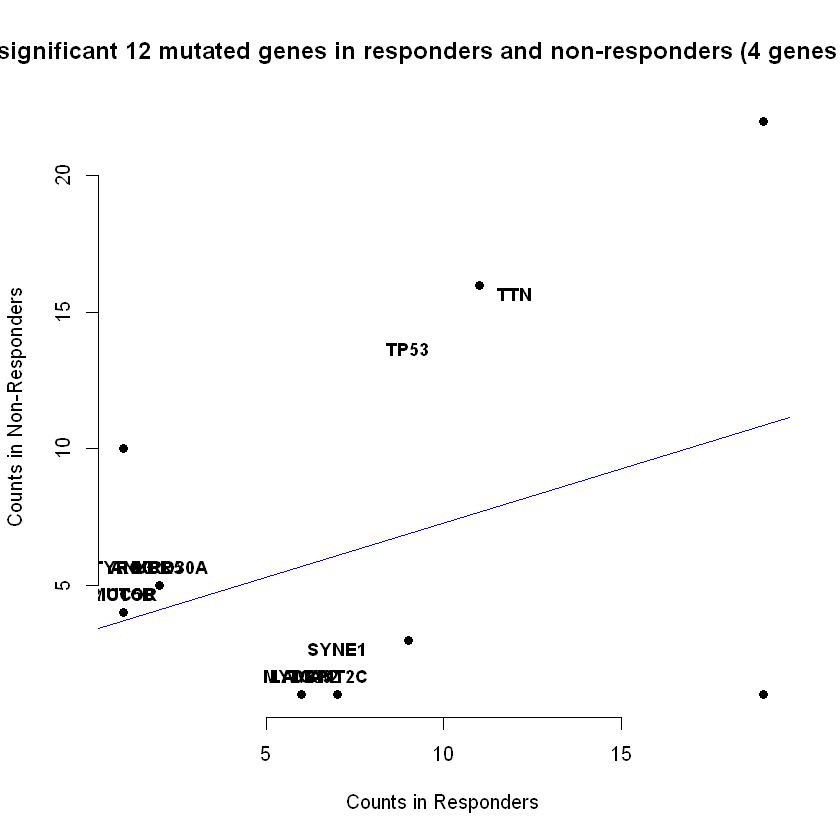

In [188]:
x <- SignificantGeneDistributionByPatients$MutationsInResponders
y <- SignificantGeneDistributionByPatients$MutationsInNonResponders
plot(x, y, main = "Quantity of significant 12 mutated genes in responders and non-responders (4 genes are overlapped)",
     xlab = "Counts in Responders", ylab = "Counts in Non-Responders", pch = 19, frame = FALSE)
abline(lm(y ~ x, data = SignificantGeneDistributionByPatients), col = "blue")
with(SignificantGeneDistributionByPatients, text(NonResponderCounts~ResponderCounts,labels=SignificantGeneDistributionByPatients$SigGeneList, pos=3, cex=0.9, font=2))


# Conclusions:

(1). Logistic regression identified 4 genes their mutations were associated with the cancer drug response

(2). Pairwise Fisher Exact Test (on total mutation counts) identified 330 genes were associated with cancer drug response

(3). Pairwise Fisher Exact Test (on total patient counts) identified only 12 genes were associated with cancer drug response

(4). The 330 genes do contain the 12 genes and the 12 genes do contain the 4 genes identified by logistic regression
